In [33]:
import numpy as np
import random
import pandas as pd
import plotnine as p9


In [22]:
from timeit import default_timer as timer

In [1]:
def alg1(data):
    data = list(data)
    changes = True
    while changes:
        changes = False
        for i in range(len(data) - 1):
            if data[i + 1] < data[i]:
                data[i], data[i + 1] = data[i + 1], data[i]
                changes = True
    return data

In [2]:
def alg2(data):
    if len(data) <= 1:
        return data
    else:
        split = len(data) // 2
        left = iter(alg2(data[:split]))
        right = iter(alg2(data[split:]))
        result = []
        # note: this takes the top items off the left and right piles
        left_top = next(left)
        right_top = next(right)
        while True:
            if left_top < right_top:
                result.append(left_top)
                try:
                    left_top = next(left)
                except StopIteration:
                # nothing remains on the left; add the right + return
                    return result + [right_top] + list(right)
            else:
                result.append(right_top)
                try:
                    right_top = next(right)
                except StopIteration:
          # nothing remains on the right; add the left + return
                    return result + [left_top] + list(left)


In [3]:
#test
list1=[1,4,7,3,7,36]
list2=[13,566,234,687,36,8,2]

In [4]:
alg1(list1)

[1, 3, 4, 7, 7, 36]

In [6]:
alg2(list1)

[1, 3, 4, 7, 7, 36]

In [8]:
alg1(list2)

[2, 8, 13, 36, 234, 566, 687]

In [9]:
alg2(list2)

[2, 8, 13, 36, 234, 566, 687]

In [48]:
#data1

In [10]:
def data1(n, sigma=10, rho=28, beta=8/3, dt=0.01, x=1, y=1, z=1):
    import numpy
    state = numpy.array([x, y, z], dtype=float)
    result = []
    for _ in range(n):
        x, y, z = state
        state += dt * numpy.array([
            sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z
        ])
        result.append(float(state[0] + 30))
    return result

In [133]:
time1s=[]
time2s=[]
for n in np.logspace(0,4).astype(int):
    start1=timer()
    alg1(data1(n))
    end1=timer()
    time1=end1-start1
    time1s.append(time1)
    start2=timer()
    alg2(data1(n))
    end2=timer()
    time2=end2-start2
    time2s.append(time2)

In [134]:
#data1

In [137]:
table_data1=pd.DataFrame({'run_time':time1s+time2s,'label':['alg1']*50+['alg2']*50,'size':list(np.logspace(0,4).astype(int))*2})

In [144]:
plot_data1=(p9.ggplot(table_data1,p9.aes(x='size',y='run_time',color='label'))
          +p9.geom_line()
          +p9.geom_abline(intercept=-5,slope=1)
          +p9.stat_function(fun=lambda x: x**2-5)
          +p9.scale_x_log10(limits=[1e-2,1e3])
          +p9.scale_y_log10(limits=[1e-6,1e4])
          )

/Users/amygdk/opt/anaconda3/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 13 rows containing missing values.
/Users/amygdk/opt/anaconda3/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 51 rows containing missing values.


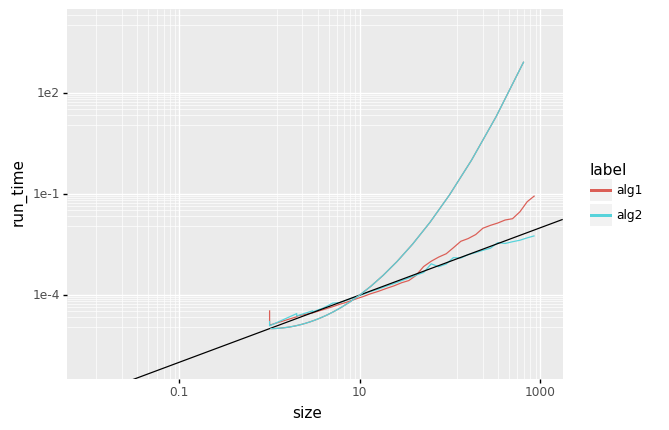

<ggplot: (8762864681451)>

In [145]:
plot_data1

In [50]:
#data2

In [49]:
def data2(n):
    return list(range(n))

In [146]:
time1s_2=[]
time2s_2=[]
for n in np.logspace(0,4).astype(int):
    start1_2=timer()
    alg1(data2(n))
    end1_2=timer()
    time1_2=end1_2-start1_2
    time1s_2.append(time1_2)
    start2_2=timer()
    alg2(data2(n))
    end2_2=timer()
    time2_2=end2_2-start2_2
    time2s_2.append(time2_2)

In [118]:
#data2

In [148]:
table_data2=pd.DataFrame({'run_time':time1s_2+time2s_2,'label':['alg1']*50+['alg2']*50,'size':list(np.logspace(0,4).astype(int))*2})

In [149]:
plot_data2=(p9.ggplot(table_data2,p9.aes(x='size',y='run_time',color='label'))
          +p9.geom_line()
          +p9.geom_abline(intercept=-6,slope=1)
          +p9.stat_function(fun=lambda x: x**2-6)
          +p9.scale_x_log10(limits=[1e-5,1e3])
          +p9.scale_y_log10(limits=[1e-6,1e4])
          )

/Users/amygdk/opt/anaconda3/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 13 rows containing missing values.
/Users/amygdk/opt/anaconda3/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 32 rows containing missing values.


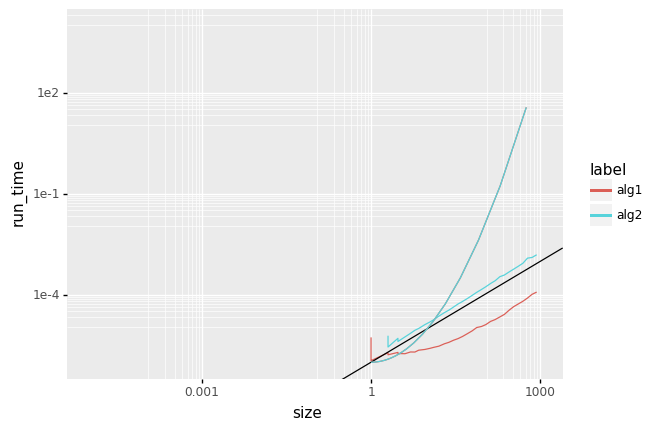

<ggplot: (8762866767830)>

In [150]:
plot_data2

In [61]:
#data3

In [62]:
def data3(n):
    return list(range(n, 0, -1))

In [128]:
time1s_3=[]
time2s_3=[]
for n in range(1000):
    start1_3=timer()
    alg1(data3(n))
    end1_3=timer()
    time1_3=end1_3-start1_3
    time1s_3.append(time1_3)
    start2_3=timer()
    alg2(data3(n))
    end2_3=timer()
    time2_3=end2_3-start2_3
    time2s_3.append(time2_3)

In [129]:
#data3

In [130]:
table_data3=pd.DataFrame({'run_time':time1s_3+time2s_3,'label':['alg1']*1000+['alg2']*1000,'size':list(range(1000))*2})#!!!

In [131]:
plot_data3=(p9.ggplot(table_data3,p9.aes(x='size',y='run_time',color='label'))
          +p9.geom_line()
          +p9.geom_abline(intercept=-6,slope=1)
          +p9.stat_function(fun=lambda x: x**2-6)
          +p9.scale_x_log10(limits=[1e-5,1e3])
          +p9.scale_y_log10(limits=[1e-6,1e4])
          )

/Users/amygdk/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
/Users/amygdk/opt/anaconda3/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 32 rows containing missing values.


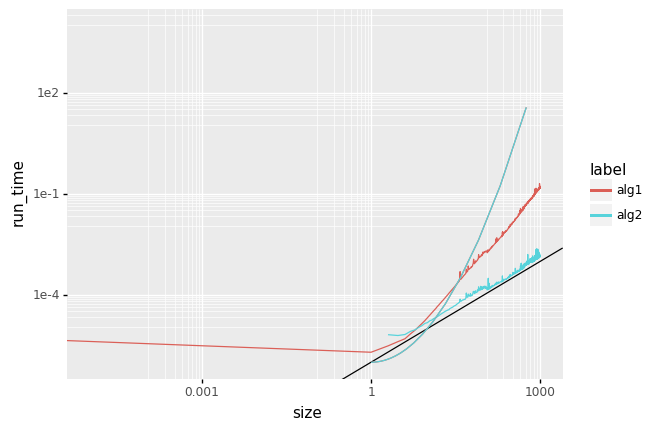

<ggplot: (8762864094434)>

In [132]:
plot_data3